In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [47]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

In [ ]:
#TASK 4.1

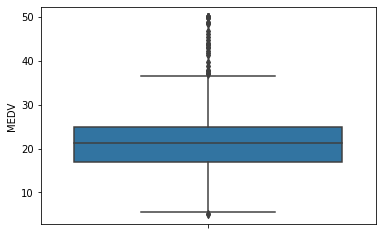

In [5]:
ax=sns.boxplot(y='MEDV',data=boston_df)

In [ ]:
#the boxplot shows that the average MEDV is around 21 MEDV 

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

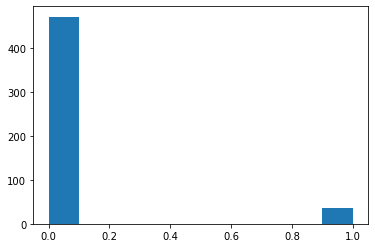

In [48]:
#Task 4.2a
pyplot.hist(boston_df['CHAS'])

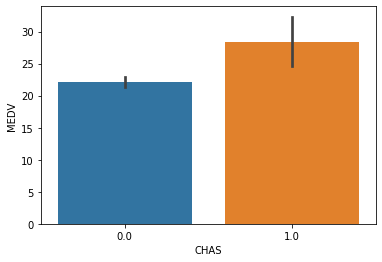

In [52]:
#Task 4.2b
ax=sns.barplot(x='CHAS', y= 'MEDV', data=boston_df)

In [ ]:
#properties that are bound by charles river have more MEDV than oroperties that are not bound by the river

In [26]:
#Task 4.3
boston_df.loc[(boston_df['AGE'] <=35), 'age_group']= '35 and younger'
boston_df.loc[(boston_df['AGE'] >35)&(boston_df['AGE'] < 70), 'age_group']= 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >=70), 'age_group']='70 and older'

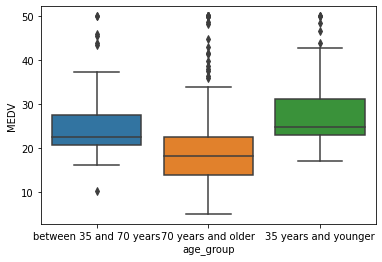

In [12]:
ax=sns.boxplot(x='age_group', y="MEDV", data=boston_df)

In [ ]:
#older properties seem to have lower MEDV compared to properties younger than 35 years and properties between 35 and 70 years

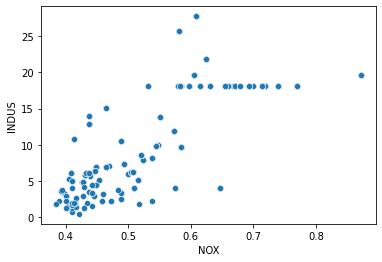

In [16]:
#Task 4.4
ax=sns.scatterplot(x='NOX', y='INDUS',data=boston_df)

In [18]:
#There seems to be a positive correlation between NOX and INDUS

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

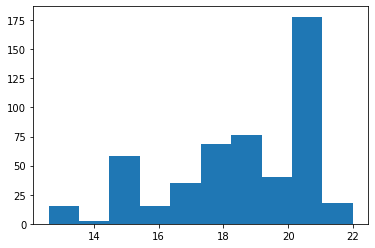

In [19]:
#Task 4.5 
pyplot.hist(boston_df['PTRATIO'])

In [ ]:
#TASK 5
#TTEST
#H0: µ_1=µ_2 there's no difference in MEDV between houses bound by charles river or not
#Ha: µ_1≠µ_2 there is a difference in MEDV between houses bound by charles river or not

In [44]:
boston_df = boston_df.astype({"CHAS": object})
boston_df['CHAS'] = boston_df['CHAS'].replace([1],'Yes')
boston_df['CHAS'] = boston_df['CHAS'].replace([0],'No')
boston_df

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 'Yes']['MEDV'], 
                   boston_df[boston_df['CHAS'] == 'No']['MEDV'], equal_var = True, nan_policy = "omit")


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [25]:
#conclusion: P<0.05, we reject the H0, there is a significant difference in MEDV between the houses bound by charles river or not

In [ ]:
#ANOVA
#H0: µ_1=µ_2=µ_3 there is no difference between the 3 age groups
#Ha: at least 1 age group is different

In [27]:
thirtyfive_lower=boston_df[boston_df['age_group']=='35 and younger']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_group']=='between 35 and 70']['MEDV']
seventy_older=boston_df[boston_df['age_group']=='70 and older']['MEDV']

f_statistic, p_value=scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy,seventy_older)
print('F_statistic:{0}, P-value:{1}'.format(f_statistic,p_value))

F_statistic:36.40764999196599, P-value:1.7105011022702984e-15


In [ ]:
#conclusion: since P<0.05, at least 1 age group is statistically different than the others

In [ ]:
#PEARSON
#H0: there is no correlation between NOX and INDUS
#Ha: there is a correlation between NOX and INDUS

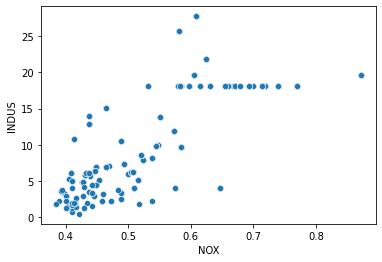

In [28]:
ax=sns.scatterplot(x='NOX', y='INDUS',data=boston_df)


In [30]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

In [ ]:
#Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between nitric oxide concentration and proportion of non-retail business acres per town.

In [ ]:
#Regression
#H0: β1  =0 (DIS has no effect on MEDV)
#Ha: β1  is not equal to 0 (DIS has an effect on MEDV)

In [32]:
## X is the input variables (or independent variables)
X=boston_df['DIS']
## y is the target/dependent variable
y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.21e-08
Time:                        18:29:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#conclusion: There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#P<0.05 so we reject the H0, DIS has an effect on MEDV